# Sprint23 ゲート付きリカレントニューラルネットワーク

## 1.このSprintについて

## Sprintの目的
発展的なRNNの手法を理解する
ドキュメントを網羅的に読む

## どのように学ぶか
Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。



## 2.KerasのRecurrentレイヤー
Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


・SimpleRNN  
・GRU  
・LSTM  
・ConvLSTM2D  

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)


ConvLSTM2Dのサンプルコード


[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

### ＜SimpleRNNのサンプルコード＞

In [1]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 108s 4ms/step - loss: 0.6959 - accuracy: 0.5264 - val_loss: 0.6793 - val_accuracy: 0.5487
Epoch 2/15
25000/25000 [==============================] - 105s 4ms/step - loss: 0.6276 - accuracy: 0.6362 - val_loss: 0.5234 - val_accuracy: 0.7402
Epoch 3/15
25000/25000 [==============================] - 107s 4ms/step - loss: 0.4888 - accuracy: 0.7720 - val_loss: 0.4874 - val_accuracy: 0.7750
Epoch 4/15
25000/25000 [==============================] - 107s 4ms/step - loss: 0.4532 - accuracy: 0.7913 - val_loss: 0.5840 - val_accuracy: 0.6908
Epoch 5/15
25000/25000 [==============================] - 106s 4ms/step - loss: 0.3916 - accuracy: 0.8303 - val_loss: 0.5311 - val_accuracy: 0.7663
Epoch 6/15
25000/25000 [==============================] - 104s 4ms/step - loss: 0.3827 - accuracy: 0.8388 - val_loss: 0.5757 - val_accuracy: 0.7204
Epoch 7/15
25000/25000 [==============================] - 104s

Epoch 3/15
25000/25000 loss: 0.4888 - accuracy: 0.7720 - val_loss: 0.4874 - val_accuracy: 0.7750

Epoch = 3の時、最低のval_Loss=0.488、最高のval_acc = 77.5% となった。


### ＜GRUのサンプルコード＞

In [2]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 250s 10ms/step - loss: 0.6170 - accuracy: 0.7342 - val_loss: 0.5814 - val_accuracy: 0.6934
Epoch 2/15
25000/25000 [==============================] - 247s 10ms/step - loss: 0.8296 - accuracy: 0.7513 - val_loss: 0.5659 - val_accuracy: 0.6951
Epoch 3/15
25000/25000 [==============================] - 249s 10ms/step - loss: 0.4844 - accuracy: 0.7883 - val_loss: 0.5730 - val_accuracy: 0.6972
Epoch 4/15
25000/25000 [==============================] - 249s 10ms/step - loss: 3.9859 - accuracy: 0.8221 - val_loss: 0.5689 - val_accuracy: 0.7045
Epoch 5/15
25000/25000 [==============================] - 249s 10ms/step - loss: 0.3232 - accuracy: 0.8643 - val_loss: 0.5730 - val_accuracy: 0.7178
Epoch 6/15
25000/25000 [==============================] - 249s 10ms/step - loss: 0.5504 - accuracy: 0.8864 - val_loss: 0.5985 - val_accuracy: 0.6813
Epoch 7/15
25000/25000 [==============================] 

Epoch 5/15
25000/25000 [==============================] - 249s 10ms/step - loss: 0.3232 - accuracy: 0.8643 - val_loss: 0.5730 - val_accuracy: 0.7178

Epoch = 5の時、最低のval_Loss=0.5730、最高のval_acc = 71.8% となった。

### ＜LSTMのサンプルコード＞

In [ ]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.
C:\Users\Takatoshi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Takatoshi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Takatoshi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Takatoshi\anaconda3\lib\site-packages\tensorflow\python\fra

Loading data...
17465344/17464789 [==============================] - 7s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train...
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 103s 4ms/step - loss: 0.4554 - acc: 0.7872 - val_loss: 0.3963 - val_acc: 0.8277
Epoch 2/15
25000/25000 [==============================] - 111s 4ms/step - loss: 0.2925 - acc: 0.8807 - val_loss: 0.3803 - val_acc: 0.8381
Epoch 3/15
25000/25000 [==============================] - 110s 4ms/step - loss: 0.2084 - acc: 0.9218 - val_loss: 0.4190 - val_acc: 0.8311
Epoch 4/15
25000/25000 [==============================] - 109s 4ms/st

Epoch 2/15
25000/25000 - 111s 4ms/step - loss: 0.2925 - acc: 0.8807 - val_loss: 0.3803 - val_acc: 0.8381

Epoch = 2の時、最低のval_Loss=0.3803、最高のval_acc = 83.8% となった。

### ＜ConvLSTM2Dのサンプルコード＞

Using TensorFlow backend.


Train on 950 samples, validate on 50 samples
Epoch 1/30
950/950 [==============================] - 48s 51ms/step - loss: 0.2882 - val_loss: 0.3559
Epoch 2/30
950/950 [==============================] - 39s 41ms/step - loss: 0.0261 - val_loss: 0.2925
Epoch 3/30
950/950 [==============================] - 39s 41ms/step - loss: 0.0039 - val_loss: 0.3331
Epoch 4/30
950/950 [==============================] - 39s 41ms/step - loss: 0.0014 - val_loss: 0.3904
Epoch 5/30
950/950 [==============================] - 39s 41ms/step - loss: 8.1032e-04 - val_loss: 0.2946
Epoch 6/30
950/950 [==============================] - 39s 41ms/step - loss: 6.0566e-04 - val_loss: 0.0505
Epoch 7/30
950/950 [==============================] - 39s 41ms/step - loss: 5.0413e-04 - val_loss: 0.0021
Epoch 8/30
950/950 [==============================] - 39s 41ms/step - loss: 4.3394e-04 - val_loss: 5.9457e-04
Epoch 9/30
950/950 [==============================] - 39s 41ms/step - loss: 3.8290e-04 - val_loss: 3.7923e-04
Epoch 10/

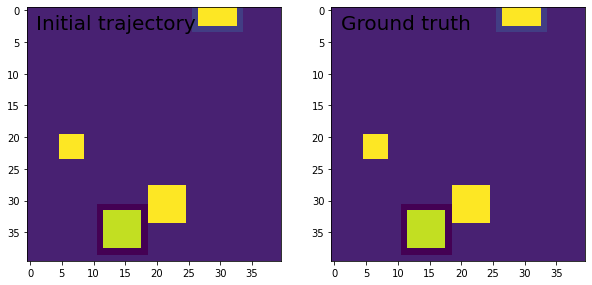

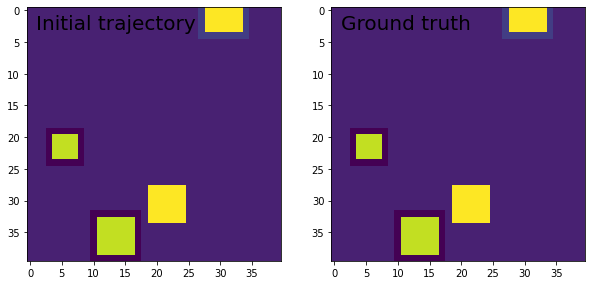

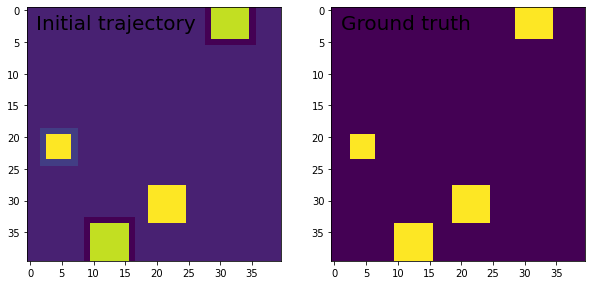

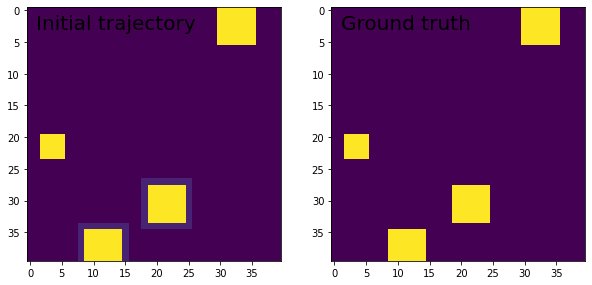

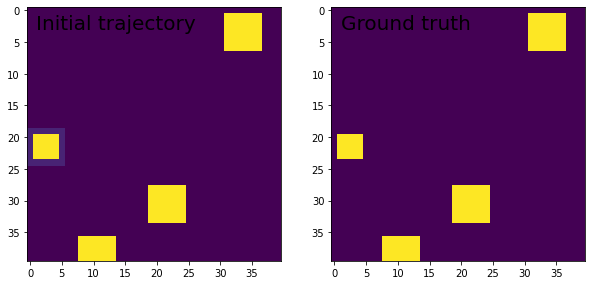

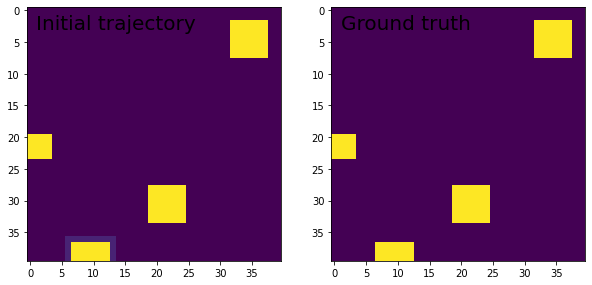

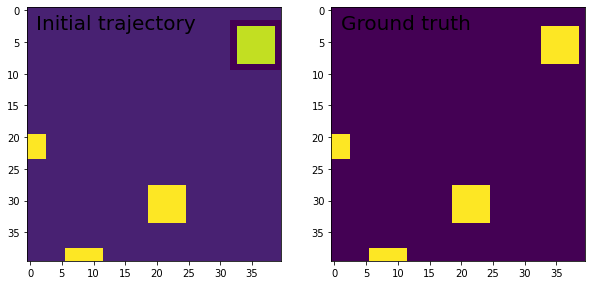

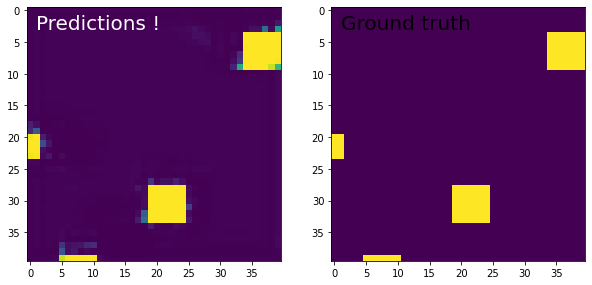

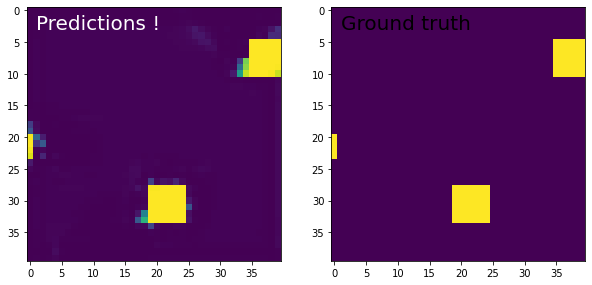

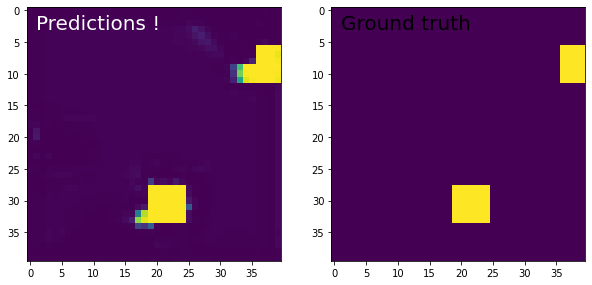

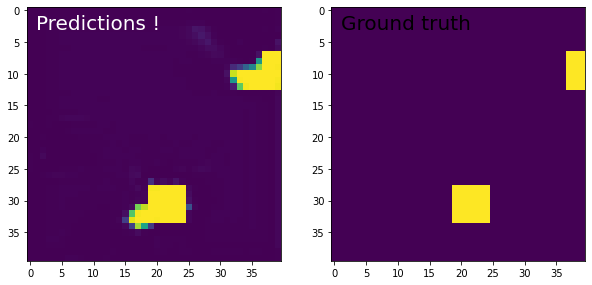

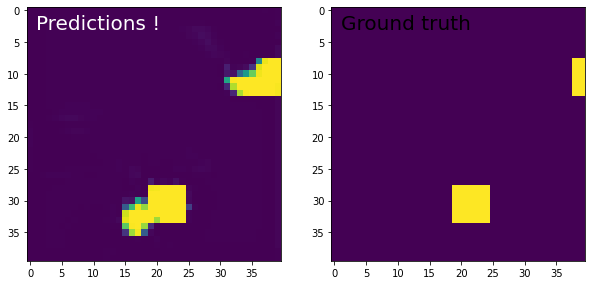

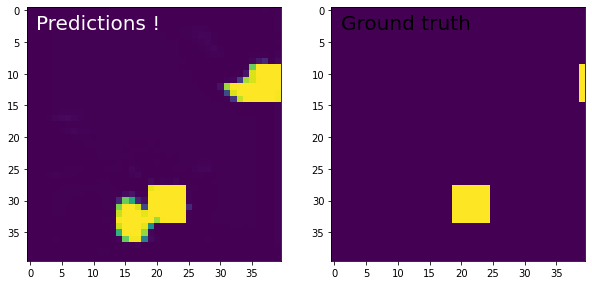

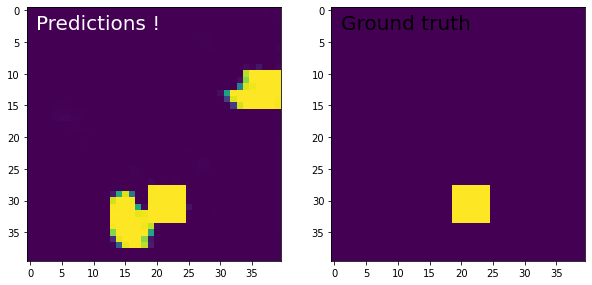

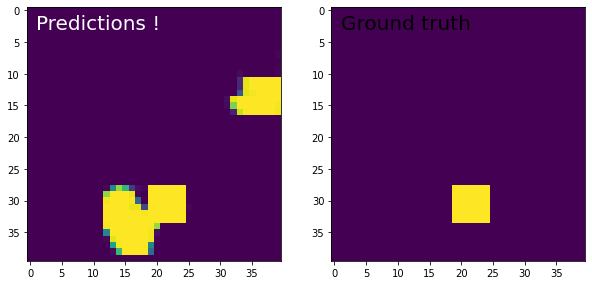

In [1]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=30, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

In [3]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [2]:
!pwd

/content


In [5]:
ls

10_animate.png  14_animate.png  3_animate.png  7_animate.png  sample_data/
11_animate.png  15_animate.png  4_animate.png  8_animate.png
12_animate.png  1_animate.png   5_animate.png  9_animate.png
13_animate.png  2_animate.png   6_animate.png  drive/


In [6]:
!cp *.png "/content/drive/My Drive/DIC/自然言語処理/animate"

In [4]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

### Skip

## 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


・RNN  
・SimpleRNNCell  
・GRUCell  
・LSTMCell  
・StackedRNNCells  
・CuDNNGRU  
・CuDNNLSTM  

### ＜RNN＞
Recurrentレイヤーに対する基底クラス．
パラメータ：cellに各Cellクラスを挿入することによりオリジナルのレイヤーを作成することが出来る

引数

〇cell: RNN cellインスタンス．RNN cellは以下の属性を持つクラスです。  
  ●call(input_at_t, states_at_t)メソッド，これは(output_at_t, states_at_t_plus_1)を返します。  
  　cellのメソッド呼び出しはオプションの引数constantsも使えます． 下記の「外部定数を渡す場合の注意」を  
　　参照してください。  
  ●state_size属性． これは1つの整数（1つの状態）でもよく，その場合はrecurrent stateのサイズになります  
 　（これはcellの出力のサイズと同じである必要があります）。 （1つ状態につき1つのサイズが対応するように）  
  　整数やリストやタプルもとれます． この場合は最初のエントリ(state_size[0])がcellの出力のサイズと  
   同じである必要があります。 cellをRNN cellインスタンスのリストとすることも可能です。  
   この場合，cellはRNNの中で他のcellの後にスタックされているいれば，効率的なstacked RNNが実現されます。  
〇return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか。
〇return_state: 真理値．出力とともに，最後の状態を返すかどうか。
〇go_backwards: 真理値（デフォルトはFalse）．Trueなら，入力系列を逆向きから処理し，逆順の系列を返します．  
〇stateful: 真理値（デフォルトはFalse）．Trueなら，バッチ内のインデックスiの各サンプル に対する最後の状態が
　次のバッチ内のインデックスiのサンプルに対する初期状態として使われます．  
〇unroll: 真理値（デフォルトはFalse）．Trueなら，ネットワークは展開され， そうでなければシンボリックループが使われます．  
　展開はよりメモリ集中傾向になりますが，RNNをスピードアップできます． 展開は短い系列にのみ適しています．  
〇input_dim: 入力の次元（整数）． この引数（または代わりのキーワード引数input_shape）は， このレイヤーをモデルの最初のレイヤーとして利用するときに必要です．  
〇input_length: 入力系列の長さ． この引数はこのレイヤーの後にFlattenからDenseレイヤーへ接続する際に必要です   
　(これがないと，denseの出力のshapeを計算できません)． Recurrentレイヤーがモデルの最初のレイヤーでなければ， 最初のレイヤーのレベルで入力系列の長さを指定する必要があります （例えばinput_shape引数を通じて）．  

入力shape：(batch_size, timesteps, input_dim)の３次元  
出力shape：return_state(default False) を True にすることで、出力に加えて最終内部状態を取得できるようになります。  
　　　　　　shapeは(batch_size, units)  
　　　　　　return_sequences = trueの場合、(batch_size, timesteps, input_dim)

### （return_stateに関して）

return_state(default False) を True にすることで、出力に加えて最終内部状態を取得できるようになります。  
shapeは(batch_size, units) 

```python
>>> SimpleRNN(units=100, return_state=True)(embedding)
[<tf.Tensor 'simple_rnn_4/TensorArrayReadV3:0' shape=(?, 100) dtype=float32>, ← 出力
<tf.Tensor 'simple_rnn_4/while/Exit_2:0' shape=(?, 100) dtype=float32>]      ← 内部状態
```

### （return_sequencesに関して）  
[言語モデルの性能が、実装により異なる件を解決する](https://medium.com/programming-soda/%E8%A8%80%E8%AA%9E%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E6%80%A7%E8%83%BD%E3%81%8C-%E5%AE%9F%E8%A3%85%E3%81%AB%E3%82%88%E3%82%8A%E7%95%B0%E3%81%AA%E3%82%8B%E4%BB%B6%E3%82%92%E8%A7%A3%E6%B1%BA%E3%81%99%E3%82%8B-5d36c841fcac)
⇒「バッチ型言語モデルにおける学習の問題点」より抜粋  


例として、A,B,C,Dという4つの系列を与えるケースを考えます。  
シーケンシャル型ではA=>B、B=>C・・・といった形で予測/学習を行っていきます。B=>Cの予測の際は、  
その前にA=>Bが処理されたという情報が引き継がれます。そのため、実質的にはA, BからCを予測しているのと同じになります。  直前の状態から次の状態を予測するだけでよい。
一方、バッチ型の場合はA, B, CからDを予測するだけです。

<img src="https://miro.medium.com/max/1132/1*2dmkaosrwHbX5JPzUNSGWg.png" style= "background-color:white;">

バッチ型でシーケンシャル型と同じ内容を学習するなら、系列の長さ毎にデータを作る必要が出てきます。A,B,C,Dの4つがあったら、A, B, C=>Dだけでなく、A=>B、A,B=>Cも学習でテータに含まないといけないということです。このように対策しても精度が改善することは確認済みですが、この場合シーケンス分だけデータが増え学習に時間がかかります。隠れ層の計算を毎回最初からやっていることになり非効率的です。
そのため、各ステップの隠れ層の状態から予測する形にします。図にすると以下のような形です。これにより、隠れ層の再計算をすることなく、都度に予測する形の学習が可能になります。

<img src="https://miro.medium.com/max/1322/1*1DeZM_4QJaVW6uRIMLgbVQ.png" style= "background-color:white;">

C, D, Eのそれぞれの推論結果をバックアップしておく様なイメージ。

これを実現するのが、return_sequencesのパラメータでこれをTrueにすることによって中間イメージがバックアップされていく。

### ＜SimpleRNNCell＞
SimpleRNNのCellクラス。  
RNN基底クラスのCellパラメータに指定して使う

引数

units: 正の整数値，出力の次元数。
activation: 活性化関数（activationsを参照）． デフォルト：ハイパボリックタンジェント（tanh）。  
　　　　　　　Noneを渡すと活性化関数は適用されません（つまり"線形"活性: a(x) = x）。  
use_bias: 真理値，レイヤーがバイアスベクトルを使うかどうか。  
kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）。  
recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）。  
bias_initializer: バイアスベクトルのInitializer（initializersを参照）。  
kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）。  
recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）。  
bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）。  
kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）。  
recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）。  
bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）。  
dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合。  
recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合。  

### ＜GRUCell＞
GRUレイヤーのためのCellクラス．  
RNN基底クラスのCellパラメータに指定して使う

units: 正の整数値，出力の次元数  
activation: 活性化関数（activationsを参照） デフォルト：ハイパボリックタンジェント（tanh） Noneを渡すと活性化関数は適用されません（つまり"線形"活性: a(x) = x）  
recurrent_activation: 再帰計算時に使う活性化関数（activationsを参照）  
use_bias: 真理値，レイヤーがバイアスベクトルを使うかどうか  
kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）  
recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）  
bias_initializer: biasベクトルのInitializer（initializersを参照）  
kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）  
recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）  
bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）  
kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）  
recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）  
bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）  
dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合  
recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合  
implementation: 実装モードで，1か2。 モード1は小さなドット積や加算処理を多数行う構造である一方，モード2は少数の大きな操作をバッチ処理します． これらのモードはハードウェアやアプリケーションによって異なるパフォーマンスプロファイルとなるでしょう  
reset_after: GRUの慣習（行列の乗算の前後のどちらでリセットゲートの適用を行うか）．False = "before" (デフォルト), True = "after" (CuDNN互換)

### ＜LSTMCell＞
LSTMレイヤーのためのcellクラス．  
RNN基底クラスのCellパラメータに指定して使う  

引数

units: 正の整数値，出力の次元数  
activation: 活性化関数（activationsを参照） デフォルト：ハイパボリックタンジェント（tanh） Noneを渡すと活性化関数は適用されません（つまり"線形"活性: a(x) = x）  
activation: 活性化関数（activationsを参照） デフォルト：ハイパボリックタンジェント（tanh） Noneを渡すと活性化関数は適用されません（つまり"線形"活性: a(x) = x）  
use_bias: 真理値，biasベクトルを使うかどうか．  
kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）  
recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）  
bias_initializer: biasベクトルのInitializer（initializersを参照）  
unit_forget_bias: 真理値．Trueなら，初期化時に忘却ゲートのバイアスに1を加えます． bias_initializer="zeros"とともに用いられます． これはJozefowicz et al.により推奨されています  
kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）  
recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）  
bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）  
kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）  
recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）  
bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）  
dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合  
recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合  
implementation: 実装モードで，1か2。 モード1は小さなドット積や加算処理を多数行う構造である一方，モード2は少数の大きな操作をバッチ処理します． これらのモードはハードウェアやアプリケーションによって異なるパフォーマンスプロファイルとなるでしょう  


### ＜StackedRNNCells＞
RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．  
複数のGRUCellやLSTMCellを1塊にして使う。
RNN基底クラスのCellパラメータに指定して使う

効率的なstacked RNNを実装するために使われます．

引数

cells: RNN cellインスタンスのリスト．
例
```python
cells = [
    keras.layers.LSTMCell(output_dim),
    keras.layers.LSTMCell(output_dim),
    keras.layers.LSTMCell(output_dim),
]

inputs = keras.Input((timesteps, input_dim))
x = keras.layers.RNN(cells)(inputs)
```

### ＜CuDNNGRU＞
NVIDIA製GPU向け　CuDNNを利用した高速なLSTM実装

TensorFlowバックエンドでGPU上でのみ動作します．

引数

units: 正の整数値，出力の次元数  
kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）  
recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）  
bias_initializer: biasベクトルのInitializer（initializersを参照）  
kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）  
recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）  
bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）  
activity_regularizer: 出力 (そのactivation) に適用するRegularizer関数（regularizerを参照）  
kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）  
recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）  
bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）  
return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか  
return_state: 真理値．出力とともに，最後の状態を返すかどうか  
stateful: 真理値（デフォルトはFalse）。　Trueなら，バッチ内のインデックスiの各サンプルに対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われます  

＜GRUとの差異＞
以下のパラメータは使用出来ない。
・activation
・recurrent_activation
・use_bias
・dropout
・recurrent_dropout
・implementation
・go_backwards
・unroll
・reset_after

### ＜CuDNNLSTM＞
NVIDIA製GPU向け　CuDNNを利用した高速なLSTM実装

TensorFlowバックエンドでGPU上でのみ動作します．

引数

units: 正の整数値，出力の次元数  
kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）  
unit_forget_bias: 真理値．Trueなら，初期化時に忘却ゲートのバイアスに1を加えます． bias_initializer="zeros"とともに用いられます． これはJozefowicz et al.により推奨されています  
recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）  
bias_initializer: biasベクトルのInitializer（initializersを参照）  
kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）  
recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）  
bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）  
activity_regularizer: 出力 (そのactivation) に適用するRegularizer関数（regularizerを参照）  
kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）  
recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）  
bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）  
return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか  
return_state: 真理値．出力とともに，最後の状態を返すかどうか  
stateful: 真理値（デフォルトはFalse）．Trueなら，バッチ内のインデックスiの各サンプルに対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われます  

＜LSTMとの差異＞
以下のパラメータは使用出来ない。  
・activation  
・recurrent_activation  
・use_bias  
・dropout  
・recurrent_dropout  
・implementation  
・go_backwards  
・unroll  

